In [1]:
import os
import numpy as np
import pandas as pd
import glob
import math

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#image imports
import imageio

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7, EfficientNetB5
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# utils
from IPython.display import clear_output

### Labels used in the process
* Out of 19 only 12 labes or interest are used and defined here

In [2]:
label_to_name = {
    0: "Nucleoplasm",
    1: "Nuclear membrane",
    2: "Nucleoli",
    3: "Nucleoli fibrillar center",
    4: "Nuclear speckles",
    5: "Nuclear bodies",
    6: "Endoplasmic reticulum",
    7: "Golgi apparatus",
    8: "Intermediate filaments",
    9: "Actin filaments",
    10: "Microtubules",
    11: "Mitotic spindle",
    12: "Centrosome",
    13: "Plasma membrane",
    14: "Mitochondria",
    15: "Aggresome",
    16: "Cytosol",
    17: "Vesicles and punctate cytosolic patterns",
    18: "Negative"
}

name_label = {
     "Nucleoplasm":0,
    "Nuclear membrane":1,
    "Nucleoli":2,
    "Nucleoli fibrillar center":3,
    "Nuclear speckles":4,
    "Nuclear bodies":5,
    "Endoplasmic reticulum":6,
    "Golgi apparatus":7,
    "Intermediate filaments":8,
    "Actin filaments":9,
    "Microtubules":10,
    "Mitotic spindle":11,
    "Centrosome":12,
    "Plasma membrane":13,
    "Mitochondria":14,
    "Aggresome":15,
    "Cytosol":16,
    "Vesicles and punctate cytosolic patterns":17,
    "Negative":18
}

### Constants used for modeling
* Each folder has files for all the 12 classes outlined abouve.

In [3]:
#IMAGE_SIZE = [456,456] #B5 Efficinet Model
#IMAGE_SIZE = [600,600] #B7 Efficinet Model
IMAGE_SIZE = [528,528] #B6 Efficinet Model

train_path = 'data/flow-new/train'
validation_path = 'data/flow-new/validation'
batch_size = 7
label_count = 19

In [4]:
## TBD -- outline how many samples in each class label..

### Geenrators for the train, validation and test
* To train models, keras image generator and images from `labels` directories are used
* Image files are created in the folders such a way that keras `ImageDataGenerator` and `flow_from_directory` utils can be used to read and feed them to neural network

In [5]:
# image generator for train and validation.
# For trainin and test image manipulation parameters are defined as below
gen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.2,
  zoom_range=0.3,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [6]:
# create generators
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
    seed=321
)
valid_generator = gen.flow_from_directory(
    validation_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
    seed=123
)

Found 73301 images belonging to 19 classes.
Found 10213 images belonging to 19 classes.


## Define model

In [7]:
# effnet = EfficientNetB6(
#     input_shape=[528,528, 3], 
#     include_top=False, 
#     weights='imagenet')
# x = GlobalAveragePooling2D ()(effnet.output)
# x = Dense(label_count, activation='softmax')(x)
# effnet_model = Model(effnet.input, x)
#model.summary()

In [8]:
# opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001, amsgrad=True)
opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.1)
# opt_nadam = tf.keras.optimizers.Nadam(learning_rate=0.0001,beta_1=0.89, beta_2=0.998)
#opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, momentum=0.1, epsilon=1e-06)
effnet_model.compile(loss='categorical_crossentropy', optimizer=opt_sgd, metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
initial_learning_rate = 0.0001
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 15.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

lr = LearningRateScheduler(lr_step_decay, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1,restore_best_weights=True)
cp = ModelCheckpoint(filepath='data/saved-model/effnet-b6-nadam/', save_weights_only=False,monitor='val_accuracy', mode='max',save_best_only=True)

## Load saved model

In [7]:
# effnet_model = tf.keras.models.load_model('data/saved-model/effnet-b6-nadam/', compile=False)

## Train and validate model

In [ ]:
# result = effnet_model.fit_generator(
#        train_generator,
#        validation_data=valid_generator,
#        epochs=40,
#        steps_per_epoch=500,
#        validation_steps=80,
#         callbacks=[lr,es,cp])

C:\Users\sriha\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 453s 877ms/step - loss: 1.3665 - accuracy: 0.5747 - val_loss: 1.3756 - val_accuracy: 0.5679
INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


Epoch 2/40

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 439s 877ms/step - loss: 1.3208 - accuracy: 0.5741 - val_loss: 1.4081 - val_accuracy: 0.5786
INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


Epoch 3/40

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 438s 876ms/step - loss: 1.3328 - accuracy: 0.5847 - val_loss: 1.2904 - val_accuracy: 0.6196
INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


Epoch 4/40

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 433s 866ms/step - loss: 1.3293 - accuracy: 0.5866 - val_loss: 1.3748 - val_accuracy: 0.5768
Epoch 5/40

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 452s 904ms/step - loss: 1.3411 - accuracy: 0.5838 - val_loss: 1.2915 - val_accuracy: 0.6107
Epoch 6/40

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 439s 878ms/step - loss: 1.3628 - accuracy: 0.5685 - val_loss: 1.4376 - val_accuracy: 0.5375
Epoch 7/40

Epoch 00007: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 441s 881ms/step - loss: 1.3479 - accuracy: 0.5927 - val_loss: 1.3308 - val_accuracy: 0.6214
INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


Epoch 8/40

Epoch 00008: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 440s 880ms/step - loss: 1.3268 - accuracy: 0.5773 - val_loss: 1.3919 - val_accuracy: 0.5661
Epoch 9/40

Epoch 00009: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 439s 877ms/step - loss: 1.3054 - accuracy: 0.5913 - val_loss: 1.3627 - val_accuracy: 0.5821
Epoch 10/40

Epoch 00010: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 438s 876ms/step - loss: 1.3882 - accuracy: 0.5586 - val_loss: 1.3061 - val_accuracy: 0.5911
Epoch 11/40

Epoch 00011: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 438s 876ms/step - loss: 1.3232 - accuracy: 0.5818 - val_loss: 1.3916 - val_accuracy: 0.5732
Epoch 12/40

Epoch 00012: LearningRateScheduler reducing learning rate to 0.0001.
500/500 [==============================] - 440s 880m

INFO:tensorflow:Assets written to: data/saved-model/effnet-b6-nadam\assets


Epoch 21/40

Epoch 00021: LearningRateScheduler reducing learning rate to 5e-05.
403/500 [=======================>......] - ETA: 1:21 - loss: 1.3132 - accuracy: 0.5914

In [11]:
# df_hist = pd.DataFrame(effnet_model.history.history)
# df_hist.to_csv('e6_hist_???.csv')
# df_hist.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.585557,0.502857,1.473361,0.535714,0.00005
1,1.572943,0.520000,1.425894,0.546429,0.00005
2,1.511666,0.540000,1.482075,0.567857,0.00005
3,1.504622,0.522143,1.472613,0.542857,0.00005
4,1.519734,0.518571,1.622380,0.485714,0.00005


In [10]:
# Test generator, feed the images as is
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = test_gen.flow_from_directory(
    'data/flow/validation',
    target_size=IMAGE_SIZE,
    shuffle=False,
    batch_size=batch_size
)

Found 48632 images belonging to 19 classes.


## Test set validation

In [11]:
labels_from_generator = (test_gen.class_indices)
labels_from_generator = [k for k,v in labels_from_generator.items()]
test_gen.reset()
labels_from_generator

['Actin filaments',
 'Aggresome',
 'Centrosome',
 'Cytosol',
 'Endoplasmic reticulum',
 'Golgi apparatus',
 'Intermediate filaments',
 'Microtubules',
 'Mitochondria',
 'Mitotic spindle',
 'Negative',
 'Nuclear bodies',
 'Nuclear membrane',
 'Nuclear speckles',
 'Nucleoli',
 'Nucleoli fibrillar center',
 'Nucleoplasm',
 'Plasma membrane',
 'Vesicles and punctate cytosolic patterns']

In [13]:
def get_confusion_matrix(model, N):
    # we need to see the data in the same order
    # for both predictions and targets
    print("Generating confusion matrix. Total images to predict", N)
    predictions = []
    targets = []
    i = 0
    for x, y in test_gen:
        i += 1
        if i % 500 == 0:
            print(f'Finished predicting {i} batches')
        p = model.predict(x)
        p = np.argmax(p, axis=1)
        y = np.argmax(y, axis=1)
        predictions = np.concatenate((predictions, p))
        targets = np.concatenate((targets, y))
        if len(targets) >= N:
            break

    cm = confusion_matrix(targets, predictions)
    return cm

In [16]:
%%time
test_gen.reset()
result = get_confusion_matrix( effnet_model,48632)

Generating confusion matrix. Total images to predict 48632
Finished predicting 500 batches
Finished predicting 1000 batches
Finished predicting 1500 batches
Finished predicting 2000 batches
Finished predicting 2500 batches
Finished predicting 3000 batches
Finished predicting 3500 batches
Finished predicting 4000 batches
Finished predicting 4500 batches
Finished predicting 5000 batches
Finished predicting 5500 batches
Finished predicting 6000 batches
Finished predicting 6500 batches
Wall time: 21min 52s


In [23]:
result.diagonal().sum()/result.sum()

0.6036971541371936

In [17]:
# print confusion matrix numbers
print(result)

[[ 550    0   49   71   16   26   21   27   58    0    0   28    1    7
     2    1   43  143    6]
 [   1   96  108   12    3   42   14    1   20    0    0   25    0    9
    24   11   35   17    6]
 [   8   19 1250  178   28  231   43    3  136    0    0  212    6   14
    53   32  361  113   43]
 [  30    7  251 2444  261  113   49   49  334    0    0   73   11   15
    23   28  380  345   80]
 [   6    1   53  416  900   44   33   19  352    0    0   11   11   12
     8    6   74   67   13]
 [  10   11  309  109   28 2163   48    5  241    0    0  134    6   93
    87   65  263   79   38]
 [  47    3   86  110   74  104 1116   75  171    0    0   52   14   29
    26   20   82   91   20]
 [  62    0   13   80   46   19  127 1035   43    0    0    7    5    2
     3    0   41   61    7]
 [  13    4  137  241   71  343   37   18 3971    0    0   45   21   53
    22   16  302   87   25]
 [   0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    1    0    0]


In [18]:
# Normalise to show percentages
cmn = result.astype('float') / result.sum(axis=1)[:, np.newaxis]

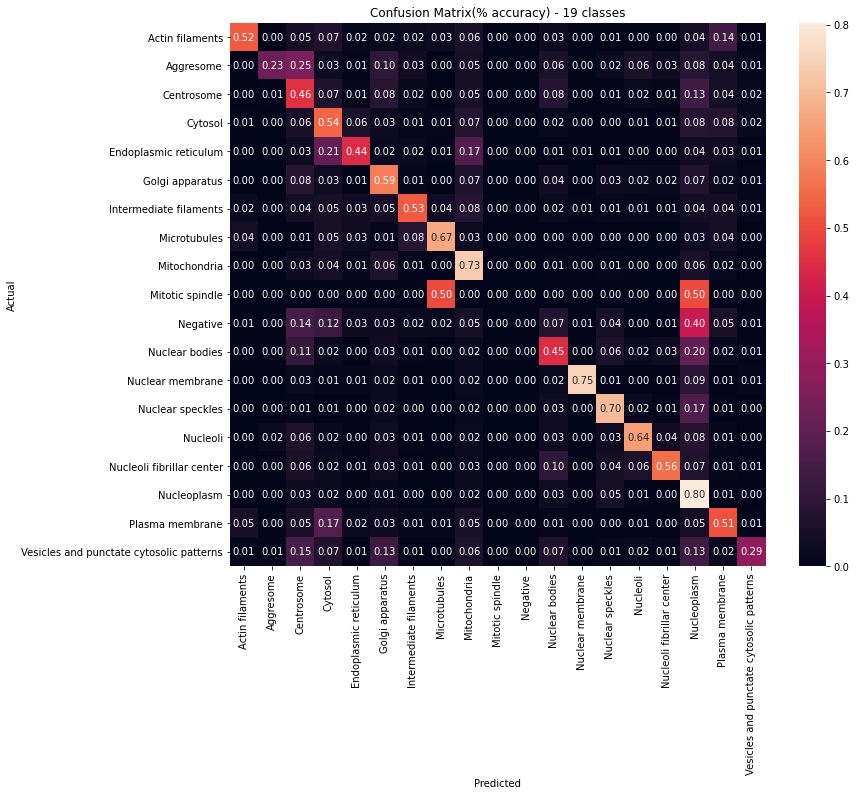

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels_from_generator, yticklabels=labels_from_generator)
plt.title('Confusion Matrix(% accuracy) - 19 classes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


## small training set 

In [14]:
%%time
test_gen.reset()
result = get_confusion_matrix( effnet_model,48632)

Generating confusion matrix. Total images to predict 48632
Finished predicting 500 batches
Finished predicting 1000 batches
Finished predicting 1500 batches
Finished predicting 2000 batches
Finished predicting 2500 batches
Finished predicting 3000 batches
Finished predicting 3500 batches
Finished predicting 4000 batches
Finished predicting 4500 batches
Finished predicting 5000 batches
Finished predicting 5500 batches
Finished predicting 6000 batches
Finished predicting 6500 batches
Wall time: 21min 2s


In [15]:
result.diagonal().sum()/result.sum()

0.5622429675933541

In [16]:
# Normalise to show percentages
cmn = result.astype('float') / result.sum(axis=1)[:, np.newaxis]

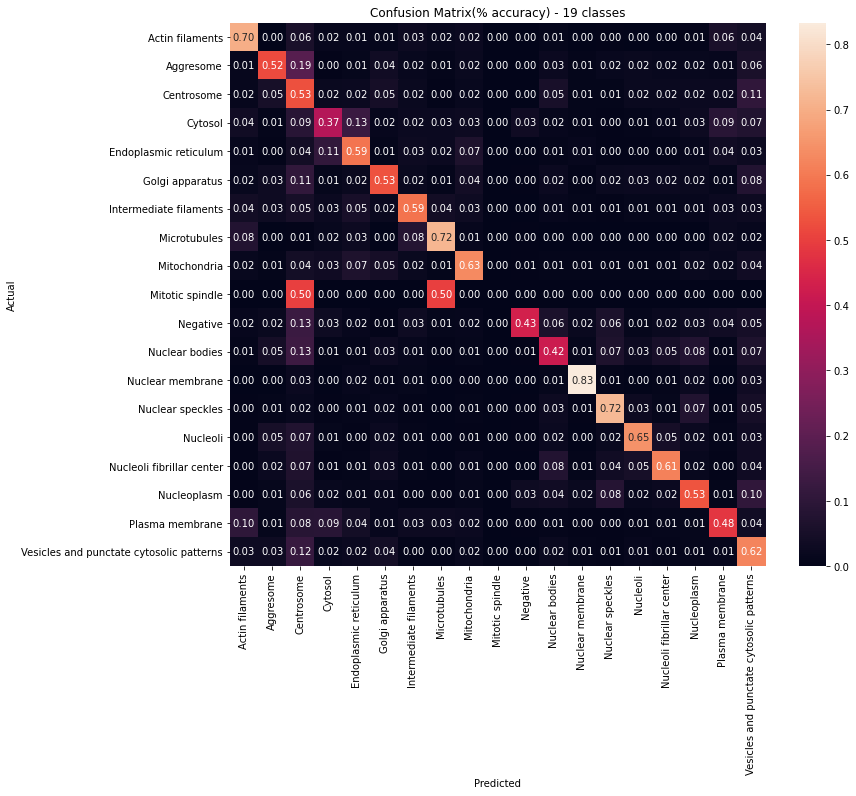

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels_from_generator, yticklabels=labels_from_generator)
plt.title('Confusion Matrix(% accuracy) - 19 classes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)